# Accelerometer Signals Classification for Activity and Movement Recognition

![img](https://camo.githubusercontent.com/ec2708af7a740e1a2396b777cf336b7c9804dc28/68747470733a2f2f7777772e616e64726f6964686976652e696e666f2f77702d636f6e74656e742f75706c6f6164732f323031372f31322f616e64726f69642d757365722d61637469766974792d7265636f676e6974696f6e2d7374696c6c2d77616c6b696e672d72756e6e696e672d64726976696e672e6a7067)

### Content
1. [Import Modules](#Import)
2. [Read data](#2.-Read-data)
3. [Data preparation](#3.-Data-preparation)
4. [Split data](#4.-Split-data)
5. [Modeling](#5.-Modeling)

 - 5.1. [Logistic Regression](#5.1.-Logistic-Regression)
 - 5.2. [Random Forest](#5.2.-Random-Forest)
 - 5.3. [Support Vector Classification](#5.3.-Support-Vector-Classification)
 - 5.4. [Decision Tree](#5.4.-Decision-Tree-Classifier)
 - 5.5. [Gradient Boosting Classifier](#5.5.-Gradient-Boosting-Classifier)

### 1. Import

In [21]:
import sys

In [22]:
import numpy as np
import pandas as pd

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

### 2. Read data

In [26]:
df = pd.read_csv('data/final_data.csv')

In [27]:
df.shape

(6462, 10)

In [28]:
df.head()

,x_mean,y_mean,z_mean,x_std,y_std,z_std,x_peaks,y_peaks,z_peaks,target
0,7.409416,9.976958,-0.256978,8.627367,11.912025,5.343059,9,11,9,running
1,5.468038,6.951644,1.152409,7.209416,9.627981,7.018684,11,10,9,running
2,7.893204,8.591353,-0.739170,10.567628,11.142983,9.375746,10,9,8,running
3,6.006893,8.418812,-0.534067,9.679843,17.851874,5.058515,8,10,9,running
4,8.396306,9.223423,2.074177,10.749277,12.921490,8.827352,9,8,9,running


### 3. Data preparation

We need to randomize the data

In [29]:
df = df.sample(frac=1).reset_index(drop=True)

In [30]:
df.shape

(6462, 10)

In [31]:
df.head()

,x_mean,y_mean,z_mean,x_std,y_std,z_std,x_peaks,y_peaks,z_peaks,target
0,6.220296,8.387048,0.204146,9.891297,14.316819,4.403547,10,9,9,running
1,0.257776,-0.007183,9.765151,0.026113,0.018862,0.016277,9,9,8,idle
2,5.973693,7.974288,-0.473573,7.491366,13.281213,5.955791,7,9,9,running
3,-3.812527,-9.844638,-1.511220,3.280564,5.934176,6.012053,7,10,10,walking
4,-4.912902,-10.031226,-0.565351,5.001124,4.997343,9.861839,10,8,8,walking


### 4. Split data

In [32]:
x_columns = [
    'x_mean', 'y_mean', 'z_mean', 
    'x_std', 'y_std', 'z_std', 
    'x_peaks', 'y_peaks', 'z_peaks'
]
X = df[x_columns]
y = df.target

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [34]:
print('X tran shape:', X_train.shape)
print('X test shape:', X_test.shape)
print('y tran shape:', y_train.shape)
print('y test shape:', y_test.shape)

X tran shape: (4329, 9)
X test shape: (2133, 9)
y tran shape: (4329,)
y test shape: (2133,)


### 5. Modeling

In [35]:
labels = df.target.unique()

In [36]:
def train_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    return confusion_matrix(y_test, y_pred)

In [37]:
def visualize_confusion_matrix(cm, labels=labels):
    df_cm = pd.DataFrame(cm, columns=labels, index=labels)
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    plt.figure(figsize = (10,7))
    sns.set(font_scale=1.4)#for label size
    sns.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g')

###### 5.1. Logistic Regression

In [38]:
lr = LogisticRegression()
lr_cm = train_model(lr)

              precision    recall  f1-score   support

        idle       1.00      1.00      1.00       327
     running       1.00      1.00      1.00      1160
      stairs       0.84      0.71      0.77        52
     walking       0.98      0.99      0.98       594

    accuracy                           0.99      2133
   macro avg       0.95      0.92      0.94      2133
weighted avg       0.99      0.99      0.99      2133



/Users/oleksandrkosovan/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


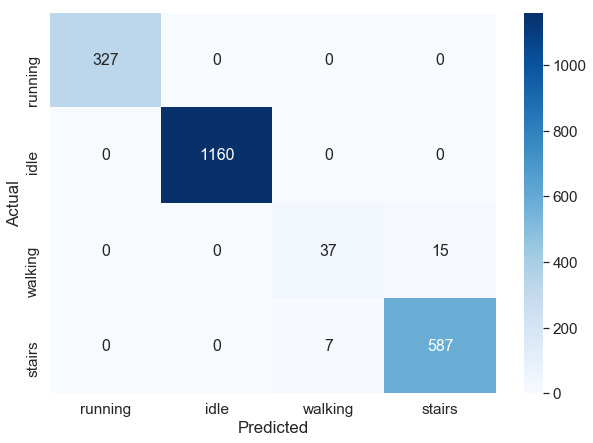

In [39]:
visualize_confusion_matrix(lr_cm)

###### 5.2. Random Forest

In [40]:
rf = RandomForestClassifier()
rf_cm = train_model(rf)

              precision    recall  f1-score   support

        idle       1.00      1.00      1.00       327
     running       1.00      1.00      1.00      1160
      stairs       1.00      0.92      0.96        52
     walking       0.99      1.00      1.00       594

    accuracy                           1.00      2133
   macro avg       1.00      0.98      0.99      2133
weighted avg       1.00      1.00      1.00      2133



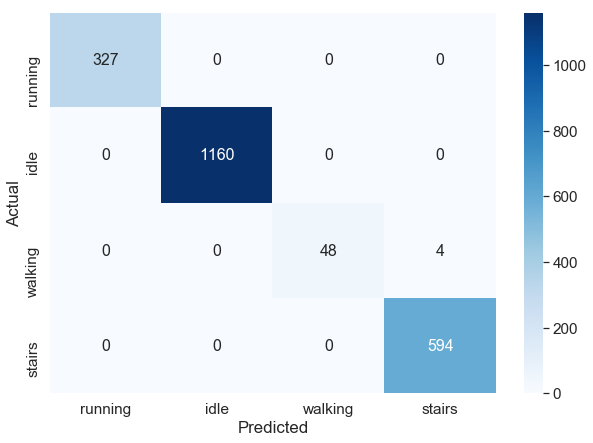

In [41]:
visualize_confusion_matrix(rf_cm)

###### 5.3. Support Vector Classification

In [42]:
svc = SVC()
svc_cm = train_model(svc)

              precision    recall  f1-score   support

        idle       1.00      1.00      1.00       327
     running       1.00      1.00      1.00      1160
      stairs       0.97      0.54      0.69        52
     walking       0.96      1.00      0.98       594

    accuracy                           0.99      2133
   macro avg       0.98      0.88      0.92      2133
weighted avg       0.99      0.99      0.99      2133



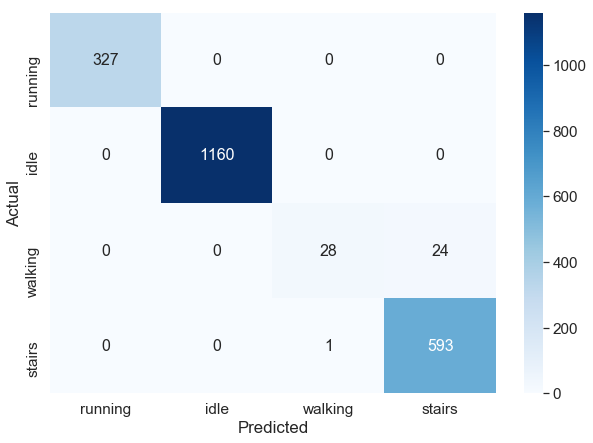

In [43]:
visualize_confusion_matrix(svc_cm)

###### 5.4. Decision Tree Classifier

In [44]:
dt = DecisionTreeClassifier()
dt_cm = train_model(dt)

              precision    recall  f1-score   support

        idle       1.00      1.00      1.00       327
     running       1.00      1.00      1.00      1160
      stairs       0.89      0.81      0.85        52
     walking       0.98      0.99      0.99       594

    accuracy                           0.99      2133
   macro avg       0.97      0.95      0.96      2133
weighted avg       0.99      0.99      0.99      2133



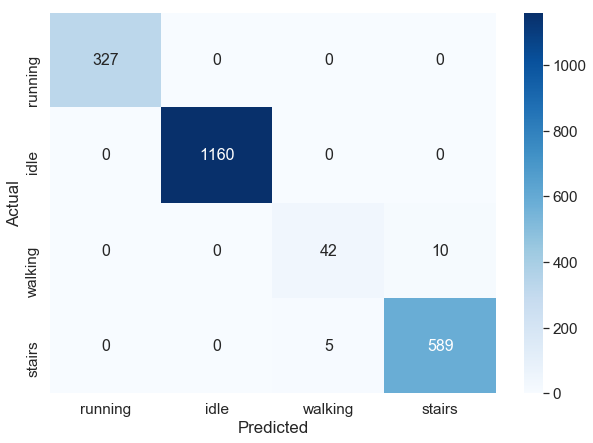

In [45]:
visualize_confusion_matrix(dt_cm)

##### 5.5. Gradient Boosting Classifier

In [46]:
gb = GradientBoostingClassifier()
gb_cm = train_model(gb)

              precision    recall  f1-score   support

        idle       1.00      0.99      1.00       327
     running       1.00      1.00      1.00      1160
      stairs       0.94      0.94      0.94        52
     walking       0.99      1.00      1.00       594

    accuracy                           1.00      2133
   macro avg       0.98      0.98      0.98      2133
weighted avg       1.00      1.00      1.00      2133



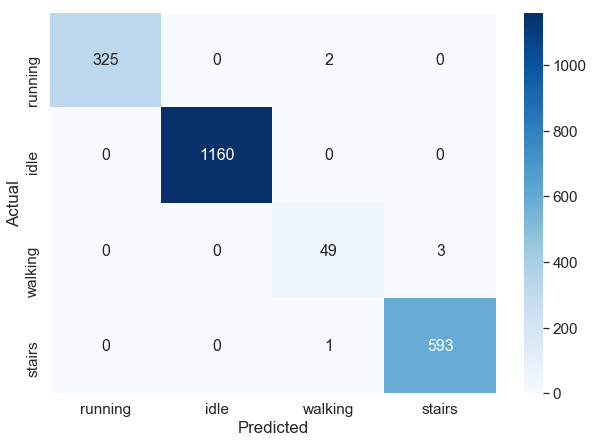

In [47]:
visualize_confusion_matrix(gb_cm)

### [To start of notebook](#Accelerometer-Signals-Classification-for-Activity-and-Movement-Recognition)